# Наивный байесовский классификатор

Начать конечно же необходимо с самой теоремы Байеса. Что это такое? В основе теоремы лежит свойство условной вероятности. Условная вероятность, например P(B/A), это вероятность собыбия B при условии, что произошло событие A. По определению:

$$P(B/A) = \frac{P(B,A)}{P(A)}$$

где P(B,A) - совместная вероятность событий A и B, P(A) - вероятность события А.

$$P(B,A) = P(B/A)*P(A)$$

Совместную вероятность P(B,A), которая равна P(A,B), можно так же выразить как

$$P(B,A) = P(A,B) = P(A/B)*P(B)$$

где P(A/B) - вероятность события A при условии, что произошло произошло событие B, P(B) - вероятность события B.

Далее

$$P(B/A)*P(A) = P(A/B)*P(B)$$

И наконец теорема Байеса

$$P(A/B) = \frac{P(B/A)*P(A)}{P(B)} $$

Отвлечемся от формул и попробуем взглянуть на теорему Байеса с более понятной точки зрения. Представим гипотетическую вселенную, в которой существуют некие правила. Допустим, что любой руководитель в этой вселенной принимает правильное решение с вероятностью 0.6.

$$P(Правильное\ решение) = 0.6$$

Вероятность того, что правильное решение принял Ваш руководитель 0.1.

$$P(Ваш\ руководитель\ /\ Правильное\ решение) = 0.1$$

Вероятность Вашего руководителя (из всех возможных руководителей в этой вселенной) 0.2.

$$P(Ваш\ руководитель) = 0.2$$

Какова вероятность того, что решене правильное, зная, что его принял Ваш руководитель?

$$P(Правильное\ решение\ /\ Ваш\ руководитель ) =\ ?$$

По теореме Байеса:

$$P(Правильное\ решение\ /\ Ваш\ руководитель ) = \frac{P(Ваш\ руководитель\ /\ Правильное\ решение)*P(Правильное\ решение)}{P(Ваш\ руководитель)}$$

$$P(Правильное\ решение\ /\ Ваш\ руководитель ) = \frac{0.1*0.6}{0.2} =  0.3$$

Что же произошло? Давайте рассчитаем факторную таблицу для данного случая. Представим, что всего произошло 100 событий.

In [1]:
from sklearn import datasets
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def factor(likelihood,apriori,evidence,n=100,
          names = [['A','~A','Total'],
                  ['B','~B','Total']]):
    htot_1 = n * apriori
    htot_2 = n - htot_1
    vtot_1 = n * evidence
    vtot_2 = n - vtot_1
    f1 = htot_1 * likelihood
    f2 = htot_1 - f1
    f3 = vtot_1 - f1
    f4 = vtot_2 - f2
    
    df = pd.DataFrame([[f1,f3,vtot_1],
                        [f2,f4,vtot_2],
                       [htot_1,htot_2,n]])
    df.columns = names[0]
    df.index = names[1]
    return df

In [3]:
fact = factor(0.1,0.6,0.2,
           names = [['Правильное решение','Не правильное решение', 'Итого'],
                   ['Ваш руководитель', 'Другие руководители', 'Итого']])
fact

,Правильное решение,Не правильное решение,Итого
Ваш руководитель,6,14,20
Другие руководители,54,26,80
Итого,60,40,100


Из этой таблицы очень легко оперделить вероятность P(Правильное решение / Ваш руководитель) - нужно взять строку Ваш руководитель, а затем 6 разделить на 20: 6 / 20 = 0.3

А теперь представьте, что нам необходимо классифицировать решения руководителей на правильные и неправильные, зная вероятность принятия правильного решения каждыми из руководителей. В данном случае, если решение было бы приняно "другими руководителями", то вероянотность того, что оно правильное равнялась бы (по таблице) 54/80 = 0.675. В этом смысл теоремы Байеса - зная априорную вероятноть (вероятность правильного решения), можно определить апостериорную вероятность (вероятность события после того, как произошло влияющее на него событие). В общем виде теорему Байеса иногода записывают так:

$$Апостериорная\ вероятность = \frac{Правдоподобие*Априорная\ вероятность}{Доказательство} $$

Теорему Баейса так же можно записать с использованием формулы полной вероятности. Для этого нужно представить знаменатель в виде:

$$ P(B) = P(A)P(B|A)+P(¬A)P(B|¬A) $$

Читается это, как вероятность события B равняется вероятность события A умноженное на вероятность B при условии A плюс вероятность события не A умноженное на вероятность B при условии не A.

Теорема Байеса тогда принимает вид:

$$P(A/B) = \frac{P(B/A)*P(A)}{P(A)P(B|A)+P(¬A)P(B|¬A)} $$

Нда, неплохо бы добавить немного интуиции. Давайте рассмотим следующий пример. В супермаркете 60% яблок из Турции и 40% яблок из Индии. 10% турецких и 15% индийских яблок — червивые. Какова вероятность, что яблоко, купленное в этом магазине, окажется червивым? Введем обозначения: Ч - червивое, Т - Турция, И - Индия.

На нужно вычислисть вероятноть P(Ч), тут то нам как раз и понадобиться формула полной вероятности:

$$P(Ч) = P(Т)P(Ч|Т) + P(И)P(Ч|И)$$

Вероятность P(И), также можно записать, как P(¬Т) (вероятность не Турции, это событие является дополнением события P(T) и в сумме их вероятности равны 1) - тогда эта формала уже ничем не будет отличаться от формулы полной вероятности. Кстати, слагаемых может быть больше, чем два! Рассчитаем P(Ч):

$$P(Ч) = 0.6*0.1 + 0.4*0.15 = 0.12$$

Теперь ответим еще на один вопрос. Представьте, что вы купили яблоко в магазине из предыдущей задачи, и оно оказалось червивым. Какова вероятность того, что оно из Турции, а не из Индии? Т.е. нужно найти P(Т/Ч).

По формуле Баеса:

$$P(Т|Ч) = \frac{P(Ч|Т)*P(Т)}{P(Ч)} $$

Знаменатель мы рассчитали в прошлом шаге, а все остальное известно. Вычислим эту вероятность:

$$P(Т|Ч) = \frac{0.1*0.6}{0.12} = 0.5$$

Давайте рассмотрим еще один классический пример. 

1% женщин больны раком груди. У 80% женщин, больных раком груди, маммограмма верно выявляет наличие заболевания; кроме того, она даёт ложный положительный результат (то есть, неверно показывает наличие рака) для 9.6% здоровых женщин. У какого процента женщин, маммограмма которых дала положительный результат, есть рак груди? Введем обозначение C - рак, М - положительная маммограмма. Нам нужно найти P(C|M). Давайте сразу запишем формулу Байеса и посмотрим, что у нас есть, а чего нету.

$$ P(C|M) = \frac{P(M|C)*P(C)}{P(M)} $$

У нас есть P(C) = 0.01, P(M|C) = 0.8 и P(M|¬C) = 0.096. Нужно лишь определить P(M), для этого воспользуемся формулой полной вероятности:

$$ P(M) = P(C)P(M|C) + P(¬C)P(M|¬C)$$

Все есть, кроме P(¬C), но это очень легко определить как P(¬C) = 1 - P(C) = 0.99. Тогда получим:

$$ P(M) = 0.01*0.8 + 0.99*0.096 = 0.1030 $$

Далее по формуле Байеса находим искомую вероятность:

$$ P(C|M) = \frac{0.8*0.01}{0.1030} = 0.0777$$

Или 7.8%

Теорема Байеса это очень крутая штука! И я настоятельно рекомендую вам увлечься ей по полной прочитав вот это [статью](http://schegl2g.bget.ru/bayes/YudkowskyBayes.html) например. Но давайте вернемся к практике и попробуем создать наивный баейсовский используя классический iris дата-сет.

Загрузим дата-сет и подпишем столбцы.

In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['class'] = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

Посмотрим на распределение - для использования наивного баесовского классификатора оно должно быть близким к нормальному.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107f61c90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109459790>]], dtype=object)

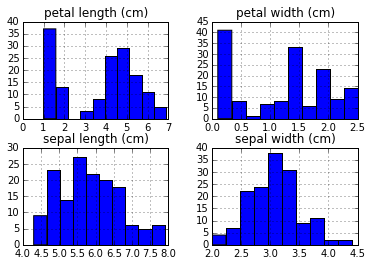

In [5]:
df.ix[:,:4].hist()

Так же можно провести тест на нормальноть. В следующем выводе нас интересут второе значение в кортеже - это вероятность нулевой гипотезы (p-value). Нулевая гипотеза в данном случае это то, что распределение нормальное. Традиционно нулевая гипотеза отвергается если p-value меньше 0.055. Давайте проверим как работает этот тест на рандомных данных.

(array([  1.,   2.,   5.,  14.,   9.,  20.,  18.,  15.,  12.,   4.]),
 array([-2.70308458, -2.2349149 , -1.76674521, -1.29857553, -0.83040584,
        -0.36223615,  0.10593353,  0.57410322,  1.0422729 ,  1.51044259,
         1.97861228]),
 <a list of 10 Patch objects>)

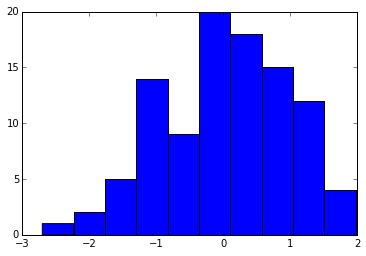

In [6]:
x = stats.norm.rvs(size = 100)
plt.hist(x)

In [7]:
stats.normaltest(x)

(1.4287776105976886, 0.48949119481257575)

В данном случае p-value > 0.055, значит мы не можем отвергнуть нулевую гипотезу о том, что это нормальное распределение - значит это распределение можно считать нормальным. Теперь проведем тесты на данных iris.

In [8]:
for i in df.columns[:-1]:
    print stats.normaltest(df[i])

(5.7355842362357334, 0.056824249410673058)
(3.5766421600696949, 0.16724071787237141)
(221.33178660723647, 8.6778712690196171e-49)
(136.77701788227716, 1.991810150572055e-30)


Для двух из четырех нулевую гипотезу нужно отвергать. Но что есть проверить распределение внутри каждого класса (вида цветка)?

In [9]:
for j in range(3):
    print j
    for i in df.columns[:-1]:
        print stats.normaltest(df[df['class']==j][i])

0
(0.19416346073876928, 0.90748183427674201)
(1.8887804302004838, 0.38891665411246801)
(2.2042103605384895, 0.33217106714951622)
(13.777761971344319, 0.0010190535387181331)
1
(0.84144536350988353, 0.6565721556024755)
(1.4509659409270497, 0.48409071097159273)
(3.3182862415011827, 0.1903019760720325)
(0.32741606910241755, 0.8489898614040613)
2
(0.20889920772655221, 0.90082019412063064)
(2.5668475719027106, 0.27708698801146453)
(2.6991800572037943, 0.25934656352707447)
(1.2383770472082003, 0.53838114397258297)


В пределах класса все распределения можно считать нормальными (за исключение одного в нулемом классе). Но на самом деле для использования наивного классификатора часто достаточно лишь **предположения** о том, что распределение нормальное - все равно классификатор будет работать достаточно надежно.

Перейдем к имплементации алгоритма классификатора. Чтобы предсказывать вероятность принадлежности точки к определнному классу, необходимо знать среднее значение и страндартное отклонение каждой переменной в пределах класса. Определим эти значения.

In [10]:
std_mean = df.groupby('class').agg(['mean','std'])
std_mean

sepal length (cm)           sepal width (cm)            \
                   mean       std             mean       std   
class                                                          
0                 5.006  0.352490            3.418  0.381024   
1                 5.936  0.516171            2.770  0.313798   
2                 6.588  0.635880            2.974  0.322497   

      petal length (cm)           petal width (cm)            
                   mean       std             mean       std  
class                                                         
0                 1.464  0.173511            0.244  0.107210  
1                 4.260  0.469911            1.326  0.197753  
2                 5.552  0.551895            2.026  0.274650

Используя предположение о том, что данные распределены нормально, можно определить функцию **[плотности вероятности](https://ru.wikipedia.org/wiki/Плотность_вероятности] по русски)**. Для этого нужно знать среднее значение страндартное отклонение случайной переменной, и следующую страшную формулу:

$$ pdf(x) = \frac{1}{(σ * \sqrt(2π))}  * e^{(-1/2)((x - μ)/2σ)^2}$$

где x - значение переменной,
    σ - стандартное оклонение,
    μ - средние значение.

Очень важно понимать, что функция плотности вероятности не определяет вероятность сама по себе. Вероятностью является площадь под кривой этой функции. Построю pdf для распределения длины sepal класса 0, чтобы объяснить это более наглядно. Я не буду сам писать функцию плотности для нормального распределения, а воспользуюсь таковой из библиотеки scipy. Обратитие внимание, что pdf может быть больше 1. Еще раз - это не вероятность!

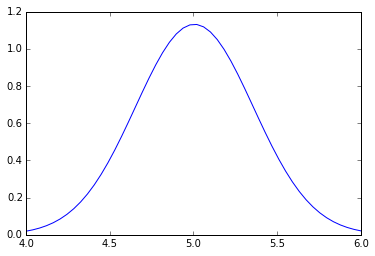

In [11]:
f_pdf = stats.norm.pdf(np.linspace(4,6,50),
                   std_mean['sepal length (cm)']['mean'][0],
                   std_mean['sepal length (cm)']['std'][0])
plt.plot(np.linspace(4,6,50),f_pdf)

Для непрерывной величины мы не можем определить вероятность того, что переменная примет **определнное значение**. Представьте, что мы хотим определить вероятность того, что переменная в данном случае примет значение 5, зная что переменная может принимать значения 5.0000001, 4.999999, 5.000002 и т.д. Непрерывная переменная может принимать бесконечное множество значений! Мы можем определить лишь вероятность того, что переменная попадет в какой-либо **интервал**. Опеределим например вероятноть того, что sepal (чашелистник) для класса 0 примет значение от 4.7 до 5.3.

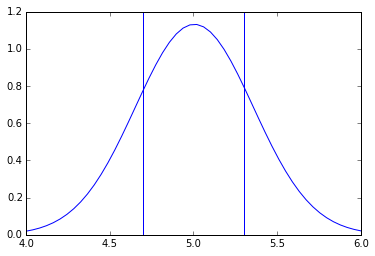

In [12]:
plt.plot(np.linspace(4,6,50),f_pdf)
plt.axvline(4.7)
plt.axvline(5.3)

Чтобы найти эту вероятность, нужно рассчитать площадь под кривой между этими двумя линиями. Для этого используется функция cdf (cumulative distribution function) или [функция распределения](https://ru.wikipedia.org/wiki/Функция_распределения). По сути это интеграл от функции плотности (чтобы найти площадь под кривой используются интегралы). Это функция так же реализована в библиотеке scipy. Она так же примимает значение случайной переменной, ее среднее значение и страндартное отклонение. На выходе она дает вероятноть того, что переменная примет значение **меньшее или равное** заданному. Вот как выглядит эта функция на графике.

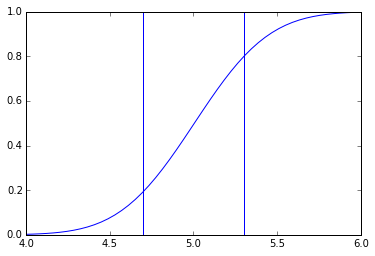

In [13]:
f_cdf = stats.norm.cdf(np.linspace(4,6,50),
                   std_mean['sepal length (cm)']['mean'][0],
                   std_mean['sepal length (cm)']['std'][0])
plt.plot(np.linspace(4,6,50),f_cdf)
plt.axvline(4.7)
plt.axvline(5.3)

Пример. Какова вероятноть того, что sepal будет меньше или равен 4.7?

In [14]:
p_47 = stats.norm.cdf(4.7,
                   std_mean['sepal length (cm)']['mean'][0],
                   std_mean['sepal length (cm)']['std'][0])
p_47

0.19266692066284558

Вероятноть достаточно маленькая. На первом графике это можно объяснить тем, первая линия отсекает лишь малую часть всей площади под кривой. На втором графике можно точно увидеть пересечение с кривой функции распределения. А какова вероятность того, что sepal будет меньше или равен 5.3?

In [15]:
p_53 = stats.norm.cdf(5.3,
                   std_mean['sepal length (cm)']['mean'][0],
                   std_mean['sepal length (cm)']['std'][0])
p_53

0.79787837240539972

Вероятность очень большая, т.к. вторая линия на графике отсекает большую часть площади под кривой. Какова же вероятность попадания переменная в интервал от 4.7 до 5.3? Очень просто.

In [16]:
p_53 - p_47

0.6052114517425542

Но вернемся к наивному классификатору. Как же высчтитывать вероятноть для сочетания непрерывных переменных? Какие брать интервалы? На самом деле, наивный баесовкий классификатор вместо вероятноти позволяет использовать значения pdf. Этим мы и воспользуемся. Поговорим немного о теории самого классификатора. В чем заключется его наивность?

Зная вероятноть длины 5.3 см чашелистника (x1) у класса setosa, вероятность класса setosa и вероятность длины 5.3 см чашелистника вообще (у всех классов), мы можем посчитать вероятность того, что растение с длиной чашелистника равной 5.3 см является растением класса setosa. По теореме Баеса:

$$ P(class=0 / x1=5.3) = \frac{P(x1=5.3 / class=0)*P(class)}{P(x1=5.3)}$$

Но у нас есть еще три переменные, которые тоже нужно использовать. Как их вписать в форму? Давайте например добавим сюда еще одну переменную sepal width (x2). Пусть например x2 = 3. Формула будет выглядеть так:

$$ P(class=0 / (x1=5.3, x2=3)) = \frac{P(x1=5.3 / class=0)* P(x2=3 / (class=0, x1=5.3))* P(class)}{P(x1=5.3, x2=3)}$$

Т.е. когда мы хотим рассчитать вероятность влияния второй переменной, мы должны использовать информацию о первой переменной, которая несомненно влияет на вторую. Вероятности эти переменных **зависимы**. Наивность баейсовского классификатора заключется в том, что мы делаем предположение, что все переменные **независимы**. Это предположение *действительно* очень наивно). Использую это предположение, вероятности каждой из переменных можно просто перемножать. Допишем эту формулу в общем виде для всех переменных iris (x1,x2,x3,x4).

$$ P(class=0 / (x1,x2,x3,x4)) = \frac{P(x1 / class=0)* P(x2 / (class=0)* P(x3 / (class=0)* P(x4 / (class=0)*P(class)}{P(x1,x2,x3,x4)}$$

А теперь запишем эту формулу для дгугого класса, например 1.

$$ P(class=1 / (x1,x2,x3,x4)) = \frac{P(x1 / class=1)* P(x2 / (class=1)* P(x3 / (class=1)* P(x4 / (class=1)*P(class)}{P(x1,x2,x3,x4)}$$

Сразу видно, что знаменатель всегда будет одинаковым, поэтому в модели наивного баейсовского классификатора он не используется.

$$ P(class / (x1,x2,x3,x4)) = P(x1 / class)* P(x2 / (class)* P(x3 / (class)* P(x4 / (class)*P(class)$$

Чтобы классифицировать объект (набор из четырех переменных в данном случае) нужно рассчитать P(class / (x1,x2,x3,x4)) для каждого класса. И то значение, которое окажется наибольшим и будет нашим предсказанием. Осталось лишь имлементировать данный алгоритм. Напишем функцию, которая будет предсказывать класс.

In [17]:
def predict_class(data, columns, std_mean):
    class_probs = []
    for cls in std_mean.index:
        class_prob = 1
        for column in columns:
            # перемножаем pdf каждой переменной
            class_prob *= stats.norm.pdf(data[column],
                                           std_mean[column]['mean'][cls],
                                           std_mean[column]['std'][cls])
        class_probs.append(class_prob)
    return class_probs.index(max(class_probs)) # находим индекс с max значением

Функция принимает dataframe, список колонок с переменными и таблицу со средними значениями и стандартными отклониями для каждого класса. На выходе она дает предсказание классла для каждой строчки в dataframe. Обратите внимание, что я не использую вероятность класса P(class), т.к. в данном дата-сете вероятность каждого класса одинакова (на каждый класс по 50 записей).

In [18]:
df.apply(predict_class,axis=1,args=(df.columns[:-1],std_mean,)).head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

Классификатор готов. Проверим его работу на использую тренировочный и тестовый сеты. Сначала поделим датафрейм на тестовый и тренировочный.

In [19]:
from sklearn.cross_validation import train_test_split
np.random.seed(2) # зафиксим рандом
train, test = train_test_split(df, test_size = 0.33)

Предскажем классы для тестового сета используя среднее значение и страндартное отклонение переменных из тренировочного сета.

In [20]:
train_std_mean = train.groupby('class').agg(['mean','std'])
predictions = test.apply(predict_class,axis=1,args=(test.columns[:-1],train_std_mean,))

In [21]:
predictions.head()

6      0
3      0
113    2
12     0
24     0
dtype: int64

Сравним предсказания с фактическими данными, чтобы определить точноть модели.

In [22]:
def mean(instance):
    return sum(instance)/float(len(instance))
mean(test['class'] == predictions)

0.95999999999999996

Точность классификатора составила 96%. Очень даже неплохо. Наивный баейсовский классификатор - очень простой и мощный алгоритм машинного обучения, и я считаю, что очень важно понимать, как он работает под "капотом". Чтобы лучше запомнить материал попробуйте взять какой-нибудь известный дата-сет и написать для него баейсовкий классификатор с нулю. Очень полезное упражнение.